In [243]:
# importando bibliotecas
import pandas as pd
import matplotlib.style as style
import matplotlib.pyplot as plt
%matplotlib inline

In [244]:
# lendo csv
try:
    exchange_rates = pd.read_csv("euro-daily-hist_1999_2020.csv")
except:
    print('erro')

In [245]:
# tratando dados: renomeando colunas e convertendo para data
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time',
                               '[Brazilian real ]':'BR_real'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)
exchange_rates.head()

,Time,[Australian dollar ],[Bulgarian lev ],BR_real,[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


In [246]:
# separando dataframes com os dados que serão utilizados
euro_to_dollar = exchange_rates[['US_dollar','Time']]
euro_to_real = exchange_rates[['Time','BR_real']]

In [247]:
# removendo dados que não interessam
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar']!='-']
euro_to_real = euro_to_real[euro_to_real['BR_real']!='-']

In [248]:
# convertendo para o tipo float
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_real['BR_real'] = euro_to_real['BR_real'].astype(float)

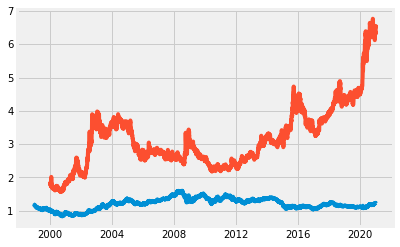

In [249]:
# analisando os graficos iniciais
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.plot(euro_to_real['Time'], euro_to_real['BR_real'])
plt.show()

In [250]:
# calculando a média móvel de cada país
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_real['rolling_mean'] = euro_to_real['BR_real'].rolling(30).mean()

In [251]:
# definindo o estilo dos gráficos
style.use('fivethirtyeight')

# separando os dados dos EUA por presidente
bush_obama_trump = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year < 2021)]
bush = bush_obama_trump.copy(
       )[bush_obama_trump['Time'].dt.year < 2009]
obama = bush_obama_trump.copy(
       )[(bush_obama_trump['Time'].dt.year >= 2009) & (bush_obama_trump['Time'].dt.year < 2017)]
trump = bush_obama_trump.copy(
       )[(bush_obama_trump['Time'].dt.year >= 2017) & (bush_obama_trump['Time'].dt.year < 2021)]

# separando os dados do Brasil por presidente
lula_dilma_temer_bolsonaro = euro_to_real.copy(
                   )[(euro_to_real['Time'].dt.year >= 2003) & (euro_to_real['Time'].dt.year < 2021)]
lula = lula_dilma_temer_bolsonaro[(lula_dilma_temer_bolsonaro['Time'].dt.year >= 2003) & 
                                  (lula_dilma_temer_bolsonaro['Time'].dt.year <= 2010)]
dilma_temer = lula_dilma_temer_bolsonaro[(lula_dilma_temer_bolsonaro['Time'].dt.year >= 2011) & 
                                         (lula_dilma_temer_bolsonaro['Time'].dt.year <= 2018)]
bolsonaro = lula_dilma_temer_bolsonaro[(lula_dilma_temer_bolsonaro['Time'].dt.year >= 2019) &
                                       (lula_dilma_temer_bolsonaro['Time'].dt.year <= 2020)]

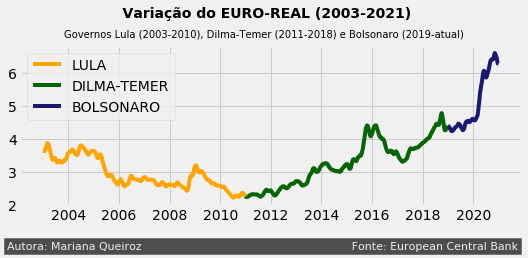

In [252]:
# definindo tamanho da imagem do gráfico
plt.figure(figsize=(8, 6))

#definindo os subplots
plt.subplot(2,1,2)

# plotando os dados dos governos
plt.plot(lula['Time'], lula['rolling_mean'],
         label="LULA",color='#ffa500')
plt.plot(dilma_temer['Time'], dilma_temer['rolling_mean'], 
         label="DILMA-TEMER",color='#006400')
plt.plot(bolsonaro['Time'], bolsonaro['rolling_mean'], 
         label="BOLSONARO",color='#191970')
plt.legend()

#definindo titulo e sub-titulo
plt.text(731516.0, 7.7, '            Variação do EURO-REAL (2003-2021)',
         fontsize=14, weight='bold')
plt.text(731516.0, 7.1, 
         '''Governos Lula (2003-2010), Dilma-Temer (2011-2018) e Bolsonaro (2019-atual)''',
        fontsize=10)

#definindo footer
plt.text(730700.0, 0.65, 'Autora: Mariana Queiroz' + ' '*60 + 'Fonte: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=11)

plt.show()

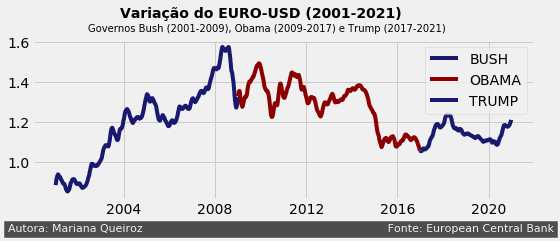

In [253]:
# definindo tamanho da imagem do gráfico
plt.figure(figsize=(8, 6))

#definindo os subplots
plt.subplot(2,1,2)

# plotando os dados dos governos
plt.plot(bush['Time'], bush['rolling_mean'],
         label="BUSH",color='#191970')
plt.plot(obama['Time'], obama['rolling_mean'], 
         label="OBAMA",color='#8B0000')
plt.plot(trump['Time'], trump['rolling_mean'], 
         label="TRUMP",color='#191970')

# habilitando as legendas
plt.legend()

#definindo titulo e sub-titulo
plt.text(731516.0, 1.72, ''*22+'''Variação do EURO-USD (2001-2021)''',
         fontsize=14, weight='bold')
plt.text(731000.0, 1.65,'Governos Bush (2001-2009), Obama (2009-2017) e Trump (2017-2021)',
        fontsize=10)

#definindo footer
plt.text(729716.0, 0.65, 'Autora: Mariana Queiroz' + ' '*70 + 'Fonte: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=11)

plt.show()


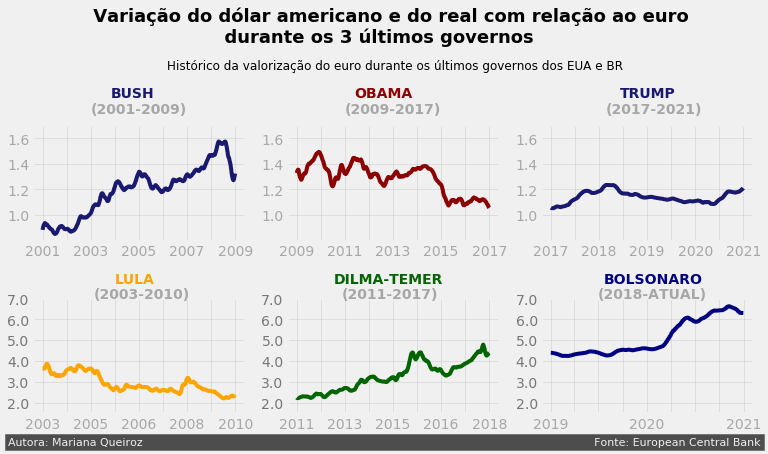

In [254]:
# definindo tamanho da imagem do gráfico
plt.figure(figsize=(10, 5))

# definindo o tamanho entre os subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.1, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.5)

# criando os subplots
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,3,4)
ax5 = plt.subplot(2,3,5)
ax6 = plt.subplot(2,3,6)

#criando arrays dos subplots
axes1 = [ax1, ax2, ax3]
axes2 = [ax4, ax5, ax6]


# definindo os subplots dos dados dos EUA
for ax in axes1:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'],
                   alpha=0.3)
    ax.grid(alpha=0.5)

# definindo os subplots dos dados dos Brasil
for ax in axes2:
    ax.set_ylim(1.5, 7.0)
    ax.set_yticks([2.0, 3.0,4.0, 5.0,6.0,7.0])
    ax.set_yticklabels(['2.0', '3.0','4.0', '5.0','6.0','7.0'],
                   alpha=0.5)
    ax.grid(alpha=0.5)
    

# configurando o ax1: Bush
ax1.plot(bush['Time'], bush['rolling_mean'],
        color='#191970')
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '',
                     '2007', '', '2009'],
                   alpha=0.3)
ax1.text(731516.0, 1.92, 'BUSH', fontsize=14, weight='bold',
        color='#191970')
ax1.text(731216.0, 1.8, '(2001-2009)', weight='bold',
        alpha=0.3)


# configurando o ax2: Obama
ax2.plot(obama['Time'], obama['rolling_mean'],
        color='#8B0000')
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '',
                     '2015', '', '2017'],
                   alpha=0.3)
ax2.text(734288.0, 1.92, 'OBAMA', fontsize=14, weight='bold',
        color='#8B0000')
ax2.text(734138.0, 1.8, '(2009-2017)', weight='bold',
         alpha=0.3)


# configurando o ax3: Trump
ax3.plot(trump['Time'], trump['rolling_mean'],
        color='#191970')
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '',
                     '2020', '', '2021'],
                   alpha=0.3)
ax3.text(736855.0, 1.92, 'TRUMP', fontsize=14, weight='bold',
        color='#191970')
ax3.text(736745.0, 1.8, '(2017-2021)', weight='bold',
         alpha=0.3)

# configurando o ax4: lula
ax4.plot(lula['Time'], lula['rolling_mean'],
        color='#ffa500')
ax4.set_xticklabels(['', '2003', '', '2005', '', '2006', '',
                     '2008', '','2010'], alpha=0.3)
ax4.text(732316.0, 7.7, 'LULA', fontsize=14, weight='bold',color='#ffa500')
ax4.text(732000.0, 7.0, '(2003-2010)', weight='bold',alpha=0.3)

# configurando o ax5: dilma_temer
ax5.plot(dilma_temer['Time'], dilma_temer['rolling_mean'],
        color='#006400')
ax5.set_xticklabels(['', '2011', '', '2013', '', '2015', '',
                     '2016', '','2018'],
                   alpha=0.3)
ax5.text(734700.0, 7.7, 'DILMA-TEMER', fontsize=14, weight='bold',color='#006400')
ax5.text(734830.0, 7.0, '(2011-2017)', weight='bold',alpha=0.3)

# configurando o ax4: bolsonaro
ax6.plot(bolsonaro['Time'], bolsonaro['rolling_mean'],
        color='#000080')
ax6.set_xticklabels(['2019','', '','','2020','','', '','2021'],
                   alpha=0.3)
ax6.text(737260.0, 7.7, 'BOLSONARO', fontsize=14, weight='bold',color='#000080')
ax6.text(737240.0, 7.0, '(2018-ATUAL)', weight='bold',alpha=0.3)

# adicionando título e sub-titulo
ax1.text(730016.0, 2.35, ' '*13+'''Variação do dólar americano e do real com relação ao euro 
                                  durante os 3 últimos governos''',
         fontsize=18, weight='bold')
ax1.text(730016.0, 2.14, 
         ' '*40+'''Histórico da valorização do euro durante os últimos governos dos EUA e BR''',
        fontsize=12)
# adicionando footer
ax4.text(730700.0, 0.0, 'Autora: Mariana Queiroz' + ' '*129 + 'Fonte: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=11)
# salvando a imagem do grafico como png
plt.savefig('euro-dolar-real.png', format='png')
plt.show()
